## Data Loading


In [1]:
#importing necessery libraries for future analysis of the dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns


In [115]:
#Read data
ubahn_location=pd.read_json("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/ubahn.json")
fahrrad_location = pd.read_json("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/fahrrad.json")
ubahn_accelerometer = pd.read_json("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Ubahn/Accelerometer_uBahn.json")

In [114]:
#Read auto data
auto_location1 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Location stadt.csv")
auto_location2 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Location.csv")
auto_location3 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Location1.csv")
auto_location4 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Location2.csv")
auto_location5 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Location3.csv")
auto_location6 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Location4.csv")
auto_accelerometer1 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Accelerometer stadt.csv")
auto_accelerometer2 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Accelerometer1.csv")
auto_accelerometer3 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Accelerometer2.csv")
auto_accelerometer4 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Accelerometer3.csv")
auto_accelerometer5 = pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/Git/MaennerML/Data/Accelerometer4.csv")

In [116]:
#Create df for auto
auto_location = [auto_location1, auto_location2, auto_location3, auto_location4, auto_location5, auto_location6]
auto_location = pd.concat(auto_location)
for auto in auto_location: 
    auto_location['Type'] = 'Auto'

auto_accelerometer = [auto_accelerometer1, auto_accelerometer2, auto_accelerometer3, auto_accelerometer4, auto_accelerometer5]
auto_accelerometer = pd.concat(auto_accelerometer)
for auto in auto_accelerometer: 
    auto_accelerometer['Type'] = 'Auto'

In [5]:
#auto_accelerometer.info()

In [93]:
#Combine data
location_df = [ubahn_location, fahrrad_location, auto_location]
location_df = pd.concat(location_df)
location_df.reset_index(inplace=True)
location_df = location_df.set_index('time')
#location_df = location_df.drop('index', axis=1, inplace=True)

#Categorical feature should be converted to numercal values
type_mapping = {'uBahn': '0', 'Auto': '1', 'Fahrrad': '2'}

location_df['Type'] = location_df['Type'].map(type_mapping).fillna('3')
location_df = location_df.drop(['index', 'level_0'], axis=1)
location_df['Type'].unique()

array(['0', '2', '1'], dtype=object)

In [ ]:
location_df.head()

In [118]:
#Same for Accelerometer
accelerometer_df = [ubahn_accelerometer, auto_accelerometer]
accelerometer_df = pd.concat(accelerometer_df)
accelerometer_df = accelerometer_df.set_index('time')
accelerometer_df = accelerometer_df.drop(['sensor'], axis=1)
#accelerometer_df['Type'].unique()

#Reminder: type_mapping = {'uBahn': '0', 'Auto': '1', 'Fahrrad': '2'}
accelerometer_df['Type'] = accelerometer_df['Type'].map(type_mapping).fillna('3')
accelerometer_df['Type'] = accelerometer_df['Type'].astype(float)
accelerometer_df['Type'].unique()



array([0., 1.])

In [126]:
accelerometer_df.head()
accelerometer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457702 entries, 1684909322000000256 to 1687692889262363400
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   seconds_elapsed  457702 non-null  float64
 1   z                457702 non-null  float64
 2   y                457702 non-null  float64
 3   x                457702 non-null  float64
 4   Type             457702 non-null  float64
dtypes: float64(5)
memory usage: 21.0 MB


In [120]:
#separating labels and predictors
x=accelerometer_df.drop('Type',axis=1)
y=accelerometer_df['Type'].values

#splitting train (75%) and test set (25%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


## Data visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='time', y='speed', hue='Type', data=location_df)

In [ ]:
accelerometer_df.plot(figsize=(10,5))

To read: [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)



## Training the model

### Decision Tree

In [128]:
#importing decision tree model
from sklearn.metrics import mean_squared_error
import numpy as np 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

"""
acc = accuracy_score(test_classes, test_prediction)
df_feature = pd.DataFrame(
            {'accuracy': acc, 'features': features, 'importance': classifier_decision_tree.feature_importances_})
df_feature = df_feature.sort_values(by='importance', ascending=False)
print("ACCURACY : " + str(acc))
print("END TREE")
"""

'\nacc = accuracy_score(test_classes, test_prediction)\ndf_feature = pd.DataFrame(\n            {\'accuracy\': acc, \'features\': features, \'importance\': classifier_decision_tree.feature_importances_})\ndf_feature = df_feature.sort_values(by=\'importance\', ascending=False)\nprint("ACCURACY : " + str(acc))\nprint("END TREE")\n'

In [129]:
classifier_decision_tree = tree.DecisionTreeClassifier()
classifier_decision_tree.fit(x_train, y_train)
tree_prediction = classifier_decision_tree.predict(x_train)

"""
#defining decision tree regressor
tree_reg=DecisionTreeRegressor()
#feeding X_train and y_train into the regressor
tree_reg.fit(x_train,y_train)
#making predictions on train set
tree_predictions = tree_reg.predict(x_train)
"""

print("Type from Data Set:" )
print(y_train)
print("Type from Prediction: ")
print(tree_prediction)

#getting MSE and RMSE values
tree_mse=mean_squared_error(y_train,tree_prediction)
tree_rmse=np.sqrt(tree_mse)

print("Mean squared error: %.3f" % tree_mse)
print("Root mean squared error: %.3f" % tree_rmse)

Type from Data Set:
[0. 0. 0. ... 0. 0. 0.]
Type from Prediction: 
[0. 0. 0. ... 0. 0. 0.]
Mean squared error: 0.000
Root mean squared error: 0.000


In [124]:
from sklearn.model_selection import cross_val_score
#performing 10-fold validation
scores=cross_val_score(tree_reg, x_train, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
tree_rmse_scores=np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean: %.3f" % tree_rmse_scores.mean())
print("STD: %.3f" %  tree_rmse_scores.std())

Scores: [0.41019404 0.41005198 0.41047801 0.40533612 0.40605416 0.40909179
 0.40756387 0.40325243 0.40717056 0.41503623]
Mean: 0.408
STD: 0.003


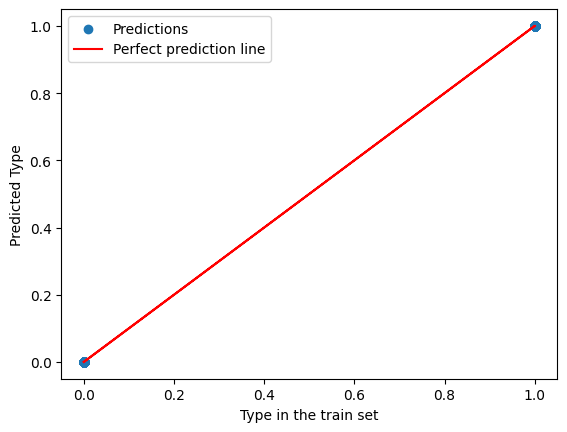

In [125]:
plt.scatter(y_train,tree_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.xlabel("Type in the train set")
plt.ylabel("Predicted Type")
plt.legend()